# Estimates
> _If you cannot see the HTML rendering (e.g. colors), view this notebook [here](https://nbviewer.jupyter.org/github/Mipanox/ME303/blob/master/others/estimates.ipynb)_

Some justification of the assumptions and estimates of the numbers.

In [40]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
%matplotlib inline

## some settings for plotting display
plt.rcParams['figure.figsize'] = (18,12)
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rc('text', usetex=True)

In [19]:
## read in data
avo_ss = ['avo_rw_df','avo_hd_df','avo_to_df','avo_ne_df','avo_ta_df','avo_lw_df','avo_ro_df']
sho_ss = ['sho_rw_df','sho_hd_df','sho_to_df','sho_ne_df','sho_ta_df','sho_lw_df','sho_ro_df']

for name in avo_ss:
    vars()[name] = pd.read_csv('../kinematics/tpva_data/%s.csv' %name)
for name in sho_ss:
    vars()[name] = pd.read_csv('../kinematics/tpva_data/%s.csv' %name)    

In [147]:
## dataframes for extracted parameters
avo_df = pd.DataFrame()
sho_df = pd.DataFrame()

---
## <font color="blue">Kinematics/Dimension Estimates</font>
### <font color="green">Body Motions</font>
Since the y-velocities are essentially zero (relative to x-velocities), we can use this fact to "normalize" the aerodynamic forces such that the lift cancels the weight:

_(The "peak" for Avocet is the tilting of the body. I suspect the center of gravity remains intact)_

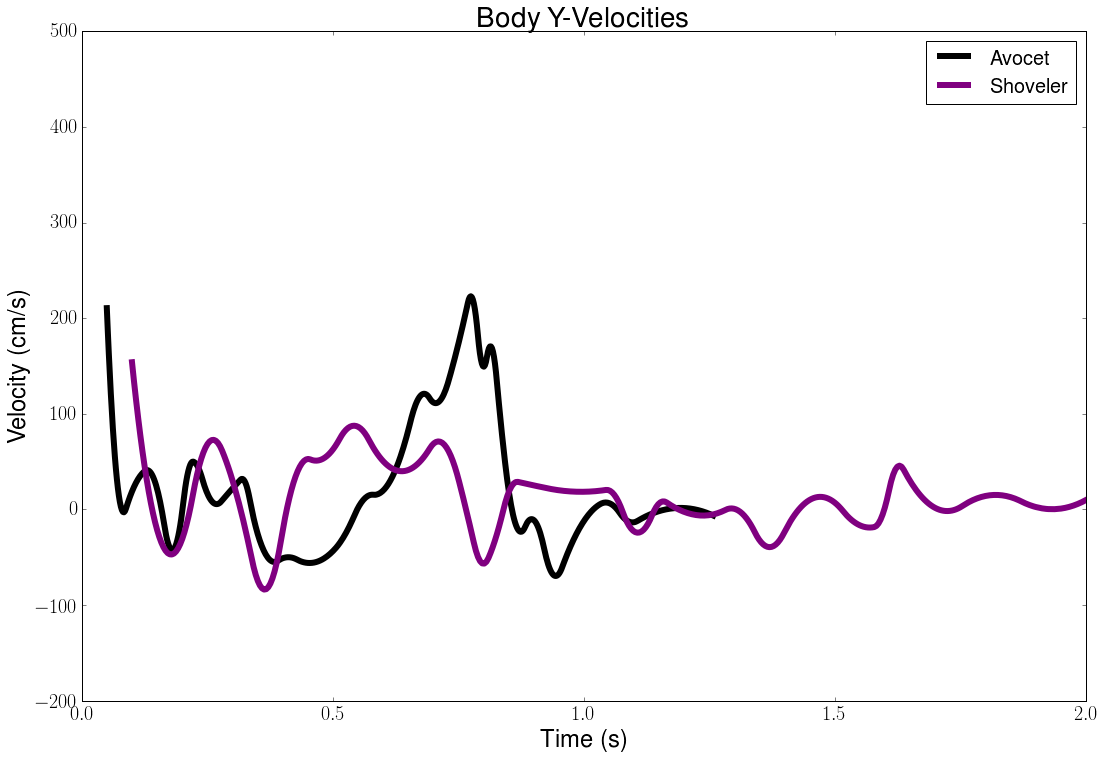

In [61]:
plt.plot(avo_ne_df['t'],avo_ne_df['vy'],c='k',lw=6,label='Avocet')
plt.plot(sho_ne_df['t'],sho_ne_df['vy'],c='purple',lw=6,label='Shoveler')
plt.title('Body Y-Velocities'); plt.xlabel('Time (s)'); plt.ylabel('Velocity (cm/s)')
plt.ylim(-200,500)
plt.legend()

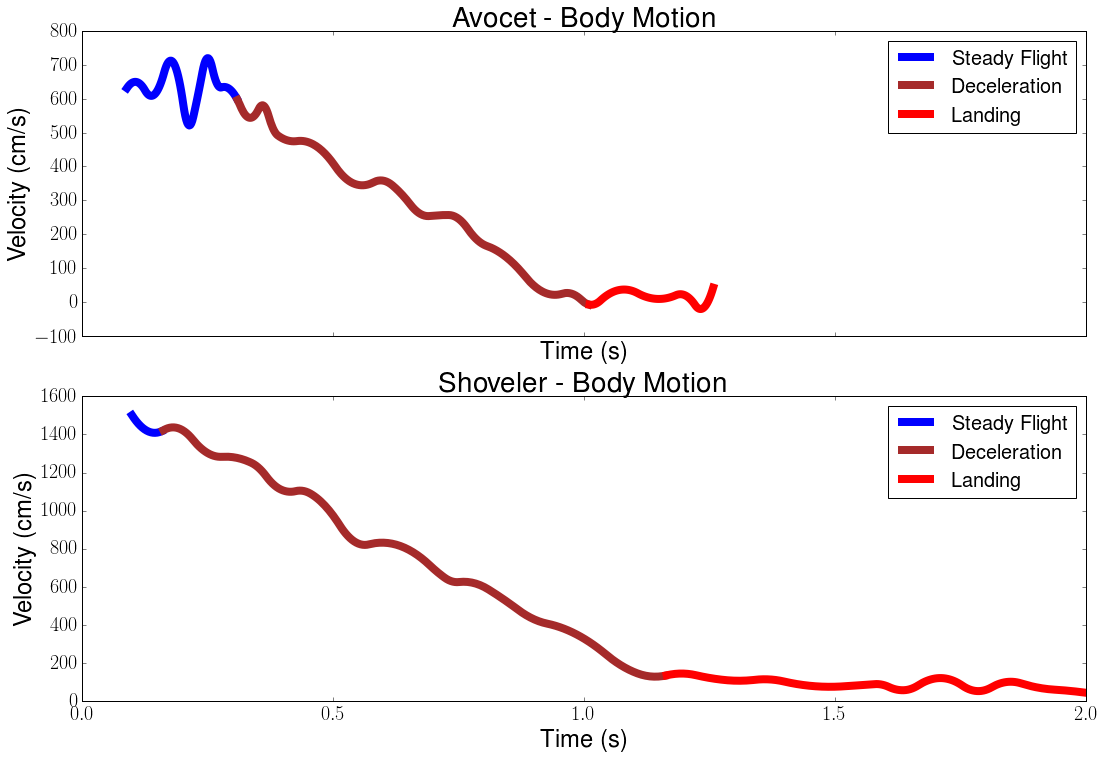

In [100]:
fig, ax = plt.subplots(2, 1, sharex=True)

t0_a,t1_a,t2_a = 20,130,480
ax[0].plot(avo_ne_df['t'][t0_a:t1_a],avo_ne_df['vx'][t0_a:t1_a],c='blue',lw=8,label='Steady Flight')
ax[0].plot(avo_ne_df['t'][t1_a:t2_a],avo_ne_df['vx'][t1_a:t2_a],c='brown',lw=8,label='Deceleration')
ax[0].plot(avo_ne_df['t'][t2_a:],avo_ne_df['vx'][t2_a:],c='red',lw=8,label='Landing')
ax[0].set_title('Avocet - Body Motion'); ax[0].set_xlabel('Time (s)'); ax[0].set_ylabel('Velocity (cm/s)')
ax[0].legend()

avo_b_sf_v = np.mean(avo_ne_df['vx'][t0_a:t1_a])
avo_b_de_v = np.mean(avo_ne_df['vx'][t1_a:t2_a])
avo_b_ld_v = np.mean(avo_ne_df['vx'][t2_a:])

t1_s,t2_s = 15,255
ax[1].plot(sho_ne_df['t'][:t1_s],sho_ne_df['vx'][:t1_s],c='blue',lw=8,label='Steady Flight')
ax[1].plot(sho_ne_df['t'][t1_s:t2_s],sho_ne_df['vx'][t1_s:t2_s],c='brown',lw=8,label='Deceleration')
ax[1].plot(sho_ne_df['t'][t2_s:],sho_ne_df['vx'][t2_s:],c='red',lw=8,label='Landing')
ax[1].set_title('Shoveler - Body Motion'); ax[1].set_xlabel('Time (s)'); ax[1].set_ylabel('Velocity (cm/s)')
ax[1].legend()

sho_b_sf_v = np.mean(sho_ne_df['vx'][:t1_s])
sho_b_de_v = np.mean(sho_ne_df['vx'][t1_s:t2_s])
sho_b_ld_v = np.mean(sho_ne_df['vx'][t2_s:])

From the division into three phases (note that the avocet's landing phase and the shoveler's steady flight phases will not be discussed), it is tempting to use a straight line to describe the deceleration phase. Other two can be treated as exhibiting constant velocities.

The (mean) velocities are:

In [71]:
print 'Avocet   mean velocities - steady flight:  {0:.0f}, decel.: {1:.0f}, landing: {2:.0f} (cm/s)'.format(avo_b_sf_v,avo_b_de_v,avo_b_ld_v)
print 'Shoveler mean velocities - steady flight: {0:.0f}, decel.: {1:.0f}, landing: {2:.0f} (cm/s)'.format(sho_b_sf_v,sho_b_de_v,sho_b_ld_v)

Avocet   mean velocities - steady flight:  638, decel.: 284, landing: 13 (cm/s)
Shoveler mean velocities - steady flight: 1435, decel.: 765, landing: 90 (cm/s)


In [148]:
### store in dataframe...
avo_df['vx_sf'],avo_df['vx_de'],avo_df['vx_ld']=np.array([avo_b_sf_v]),np.array([avo_b_de_v]),np.array([avo_b_ld_v])
sho_df['vx_sf'],sho_df['vx_de'],sho_df['vx_ld']=np.array([sho_b_sf_v]),np.array([sho_b_de_v]),np.array([sho_b_ld_v])

### <font color="green">Wing Motions</font>
Due to the lack of data in the steady flight phase for the shoveler, here only avocet data is presented. And as usual, the two species are considered the same.

In [116]:
exec(open('../codes/fit_sine.py').read())

** Velocity **

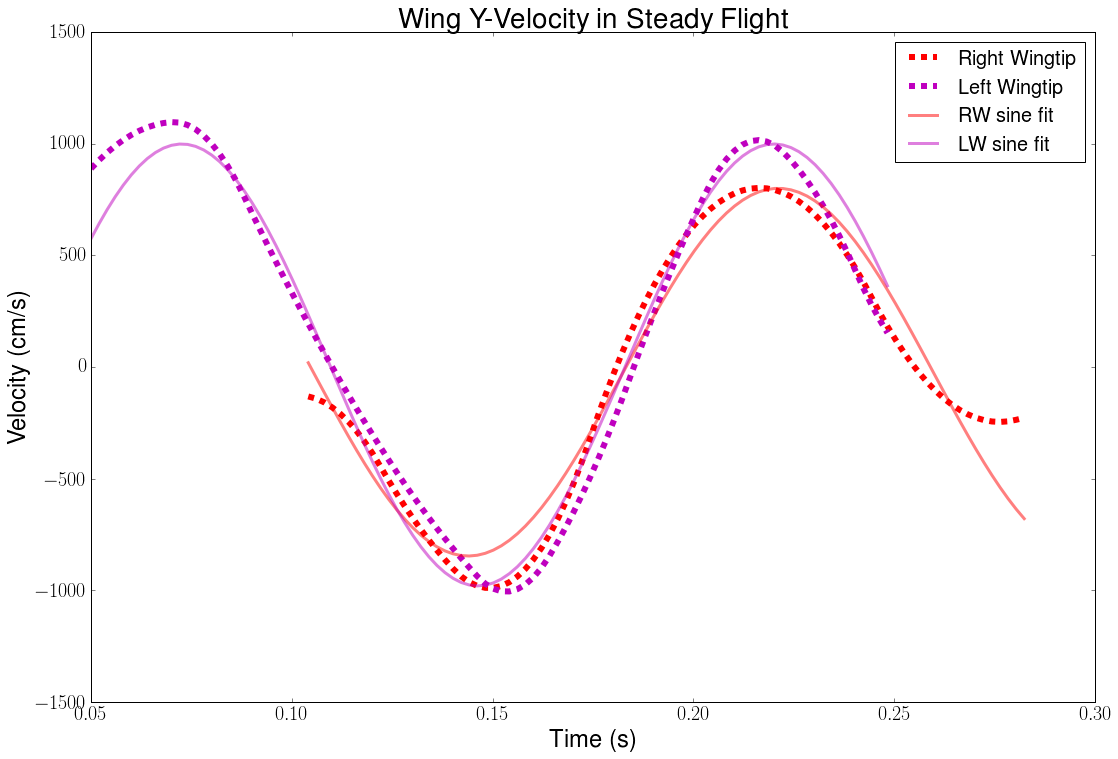

In [135]:
### because the time ranges are different, we have to match the indices in 'time'
t0_a,t1_a = 0,100
tr = avo_rw_df['t'][t0_a:t1_a-10]
rw = avo_rw_df['vy'][t0_a:t1_a-10]
tl = avo_lw_df['t'][t0_a:t1_a]
lw = avo_lw_df['vy'][t0_a:t1_a]

plt.plot(tr,rw,'r--',lw=6,label='Right Wingtip')
plt.plot(tl,lw,'m--',lw=6,label='Left Wingtip')
plt.title('Wing Y-Velocity in Steady Flight'); plt.xlabel('Time (s)'); plt.ylabel('Velocity (cm/s)')

guesses = [700.,6/0.25,0.1,0.]
rwfit = fit_sine(tr,rw,guesses)
lwfit = fit_sine(tl,lw,guesses)

plt.plot(tr,rwfit[0],c='r',lw=3,alpha=0.5,label='RW sine fit')
plt.plot(tl,lwfit[0],c='m',lw=3,alpha=0.5,label='LW sine fit')
plt.legend()

and the best-fit parameters are

In [136]:
print 'RW - Amplitude: {0:.0f} (cm), Frequency: {1:.1f} (Hz)'.format(abs(rwfit[1][0]),rwfit[1][1]/2/np.pi)
print 'LW - Amplitude: {0:.0f} (cm), Frequency: {1:.1f} (Hz)'.format(abs(lwfit[1][0]),lwfit[1][1]/2/np.pi)

RW - Amplitude: 824 (cm), Frequency: 6.5 (Hz)
LW - Amplitude: 990 (cm), Frequency: 6.8 (Hz)


In [149]:
### store in dataframe...take average, same for two birds...
avo_df['w_f']=np.array([(rwfit[1][1]+lwfit[1][1])/4/np.pi])
sho_df['w_f']=np.array([(rwfit[1][1]+lwfit[1][1])/4/np.pi])

** Position **

(0.05, 0.35)

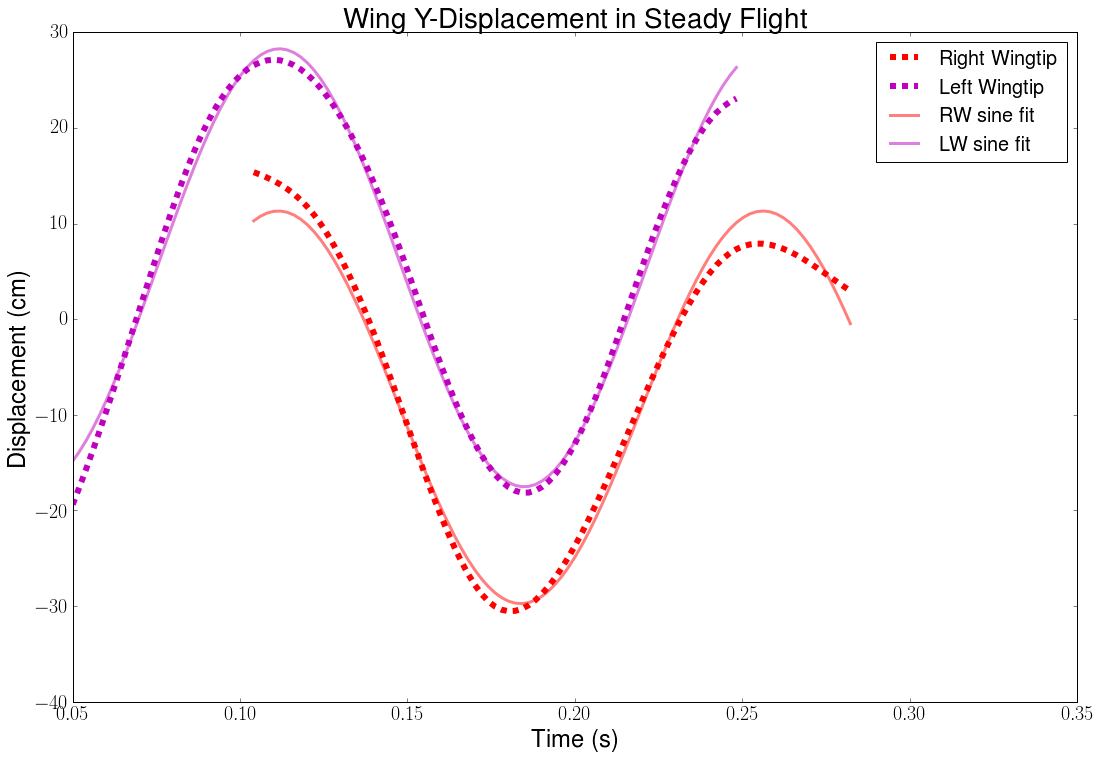

In [142]:
rr = avo_rw_df['py'][t0_a:t1_a-10]
ll = avo_lw_df['py'][t0_a:t1_a]

plt.plot(tr,rr,'r--',lw=6,label='Right Wingtip')
plt.plot(tl,ll,'m--',lw=6,label='Left Wingtip')
plt.title('Wing Y-Displacement in Steady Flight'); plt.xlabel('Time (s)'); plt.ylabel('Displacement (cm)')

guesses = [700.,6/0.25,0.1,0.]
rrfit = fit_sine(tr,rr,guesses)
llfit = fit_sine(tl,ll,guesses)

plt.plot(tr,rrfit[0],c='r',lw=3,alpha=0.5,label='RW sine fit')
plt.plot(tl,llfit[0],c='m',lw=3,alpha=0.5,label='LW sine fit')
plt.legend(); plt.xlim(0.05,0.35)

In [150]:
print 'RW - Amplitude: {0:.0f} (cm), Frequency: {1:.1f} (Hz)'.format(abs(rrfit[1][0]),rrfit[1][1]/2/np.pi)
print 'LW - Amplitude: {0:.0f} (cm), Frequency: {1:.1f} (Hz)'.format(abs(llfit[1][0]),llfit[1][1]/2/np.pi)

RW - Amplitude: 21 (cm), Frequency: 6.9 (Hz)
LW - Amplitude: 23 (cm), Frequency: 6.8 (Hz)


Remark: the frequencies agree quite well with the veloticy fits, again supporting the sinusoidal ansatz. 
Indeed, $2\pi f A_p \approx 6\cdot7$(Hz)$\cdot20$(cm)$=840$(cm/s)$ \approx A_v$, where $A$'s are the amplitudes.

In [151]:
### store in dataframe...take average, same for two birds...
avo_df['w_a']=np.array([abs((rrfit[1][0]+llfit[1][0])/2)])
sho_df['w_a']=np.array([abs((rrfit[1][0]+llfit[1][0])/2)])

### <font color="green">Foot</font>
There isn't much to say about the foot and in fact we can't since the resolution of the video is not sufficient. Nonetheless, below shows a quick estimate:
<br>
![](./imgs/sho_foot_angle.png)
<br>
And it seems reasonable to take the length of the "plate" the same as the beak, which is about 10 centimeters long.

In [156]:
sho_df['foot_ang']=np.array([10.])
sho_df['foot_len']=np.array([10.])

---
## <font color="blue">Assumption Justification</font>
### <font color="green">Wing</font>
#### <font color="red">Shape</font>
Without losing too much precision, half of an ellipse delineates a wing with simple-enough mathematics.
Here displays an ellipse (yellow) overlayying on an actual pigeon wing (the red dots trace the outline).
As simple as it is, one can specify such an ellipse by the chord length at the shoulder and the radius,
denoted $2a$ and $b$ in the figure.
<br>
![](./imgs/pigeon_wing.jpg)

#### <font color="red">Harmonicity</font>
See above for the wing motions. 
It is not, however, possible to validate our choice of harmonic wing rotation (i.e. variation of angle of attack) using our videos. Just convince ourselves it is a sensible approximation too. (There does exist evidence of such harmonicity in the literature)

#### <font color="red">Upstroke omission</font>
_(References: Photo credit: Greg Gillson's blog [post](http://sandiegogreg.blogspot.com/p/how-to-identify-birds-in-flight.html))_
<br><br>
It is perhaps best to contrast the wing morphology in the up/downstroke phases:<br>
![](./imgs/cackling_updown.png)
<br>
These are snapshots of upstroke and downstroke at roughly the same wing position. Apparently the wings are "strected out" only in the downstroke, and thus the assumptions of hovering flight in the QS model is not valid for the upstroke. This omission of upstroke contribution is also common practice in the literature.

### <font color="green">Foot</font>
_(References: Manson's famous [textbook](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP002022.html),
  Granville [1977](http://adsabs.harvard.edu/abs/1977JShR...21...30G). See also those in the models [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb))_
<br><br>
Savitsky's planing flat plate model was only verified empirically in a certain characteristic velocity range.
This characteristic is defined to be the Froude number (which originates from the gravity waves), with the scale being the beam (width) of the plate:
<br><br>
$
\;\;\;\;C_v \equiv \frac{v}{\sqrt{gb}}
$
<br><br>
And the formulae for the lift and drag forces are only applicable (chekced, say) when $0.6\leqslant C_v \leqslant 13$ when the trim angle (angel of attack of the plate) small: $2^\circ\leqslant\tau\leqslant15^\circ$,
and when the aspect ratio of the plate $\lambda\leqslant4$.
Since it is quite obvious that the foot of the bird is not slenderer than $\lambda=4$, the former two are the only ones needed to be checked below.

#### <font color="red">Velocity Coefficient</font>
According to the kinematics estimates, the shoveler skis at a speed of $\sim1$m/s,
and the width of the foot is assumed to be $7$cm (cf. length is $10$).

In [158]:
## Flat plate planning (Savitsky 1964, Eqn (15))
v_s = 1. * u.m/u.s # est. skiing speed
b   = 7. * u.cm # 'beam' : width of foot
chd = 10.* u.cm # chord length

C_v = (v_s/np.sqrt(c.g0*b)).to(u.dimensionless_unscaled)
print 'Froude Number for shoveler foot "plate": {0:.2f}'.format(C_v)

Froude Number for shoveler foot "plate": 1.21


which happily lies above the lower limit of the interval. Nevertheless, it is necessary to condiser both the buoyancy lift and the dynamic lift when the number is so small.

#### <font color="red">Small Trim Angle</font>
See above for estimating foot angle. In a word, we have $\tau\approx10^\circ$ which is indeed in the range of applicability.

#### <font color="red">Laminar Boundary Layer</font>
One subtle (while crucial) caveat when picking a planing plate model for "boats" is that,
the Reynolds numbers are disparate. This can be seen if we compute the "transition length" where the boundary layer attached to the plate becomes turbulent. In water, this occurs at the so-called critical Reynolds number: $Re \approx 5\times10^5$.

In our case, this translates to a length scale of

In [164]:
nu_w = 1e-6 * u.m**2/u.s # kinematic viscosity of water
Re_foot = (v_s*chd/nu_w).to(u.dimensionless_unscaled)

## Onset of turbulent boundary layer
Re_cri = 5e5 # (transition critical Re from Manson)

print 'Transition length for shoveler foot: {0:.2f}'.format((Re_cri*nu_w/v_s).to(u.cm))
print 'Reynolds number for shoveler foot  : {0:.2e}'.format(Re_foot)

Transition length for shoveler foot: 50.00 cm
Reynolds number for shoveler foot  : 1.00e+05


Clearly this is way beyond what the small foot can bear. This forces us to use the drag coefficient for laminar boundary layers. Let me do a sanity check for boats here to see if my calculated values are consistent with what the papers quote (e.g., Table 1 in Savitsky)

In [167]:
## boat parameters for check
v_bt = 10. * u.m/u.s
L_bt = 20. * u.m

Re_bt = (v_bt*L_bt/nu_w).to(u.dimensionless_unscaled)

### Manson Table 9.3 (Schlichting 2000)
C_Dl_bt = 1.328 / (Re_bt)**0.5 # laminar
C_Dt_bt = 0.455 / np.log10(Re_bt)**2.58 # turbulent, smooth plate
C_Ds_bt = 0.075 / (np.log10(Re_bt)-2)**2 # corrected Schoenherr formula (Granville 1977)

In [169]:
print 'Reynolds number for a typical boat: {0:.2e}'.format(Re_bt)
print 'Drag coefficient (smooth plate)      : {0:.5f}'.format(C_Dt_bt)
print '                 (Schoenherr formula): {0:.5f}'.format(C_Ds_bt)
print '                 quoted in the papers: {0:.5f}'.format(0.00192)

Reynolds number for a typical boat: 2.00e+08
Drag coefficient (smooth plate)      : 0.00193
                 (Schoenherr formula): 0.00189
                 quoted in the papers: 0.00192


They do match! It is worth noted, nonetheless, that I will assume constancy for the coefficients. Namely, in the small angel limit, $C_D(\tau)\approx C_D(0)$ (like the formulae in Table 9.3 in Manson)
<br><br>
*(Note: The Re is consistent (on magnitude-of-order) with the "extreme" ship from [wikipedia](https://en.wikipedia.org/wiki/Reynolds_number))*

### <font color="green">Body</font>
_(References: Dickinson et al. [2008](http://arc.aiaa.org/doi/10.2514/1.29862); 
  see also the models [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb))_
<br>
#### <font color="red">Neglible Aerodynamics</font>
Similar to the wing, the forces exerted on the bird's body are normally written in the standard form:
<br><br>
$
\;\;\;\;\mathbf{F_{b,D}} \equiv \frac{1}{2}\rho C_{b,D}(\delta)S_b\left \| \mathbf{u_b} \right \|^2
$
<br><br>
where the subscripts $b$ stand for `body` of course, and since we are doing an estimate here, 
I'll focus only on the drag, which could impose ambiguity in assessing power if the body drag were significant.
That being said, the body drag coefficient is taken to be $C_{b,D}(\delta)\sim C_{b,D}\approx0.6$, neglecting angle of attack effects. $S_b$ is the cross-sectional area of the body, which I approximate as $S_b\approx\pi R_b^2\approx \pi\times10^2$(cm$^2$)$\approx300$(cm$^2$).

In [172]:
rho_air = 1. * u.kg/u.m**3
C_b_D   = 0.6
S_b     = 300. * u.cm**2
u_b     = 5. * u.m/u.s # somewhere in between the max and min

F_b_D = ( 0.5 * rho_air * C_b_D * S_b * u_b**2 ).to(u.N)
print 'Estimated body drag force: {0:.2f}'.format(F_b_D)

Estimated body drag force: 0.23 N


As we see in the QS [calculations](https://github.com/Mipanox/ME303/blob/master/dynamics/QS.ipynb), this is negligible compared with the other forces. Thus, we ignore the body altogether.

#### <font color="red">Torque Balance</font>
This subsection is more like a discussion of plausible way to accommodate the possible inconsistency between the QS model and the planing plate model. For the shoveler, the two forces might have to "normalize" to one another so that they can be juxaposed properly. There are two possibilities:
<br><br>
(1) **Torque balance in the deceleration**:
<br>
![](./imgs/sho_torq_bal.png)
<br>
Because the bird is not "rotating" in this phase, the wings' aerodynamic braking force generates a torque equal to the feet's hydrodynamic drag torque. Then the observed geometry above suggests that the force arms are in equal length as well. So the two forces also cancel out. This saves us trouble doing math on torque and rotation.
<br><br>
(2) ** Lift equals weight in steady flight**:
<br>
As the title says, the bird experiences no net force when flying steadily.
Despite its apparent simpleness, we unfortunately do not have enough data to do the calculation for the shoveler (see above for the very restricted amount of this phase). Using the avocet data on the other hand may introduce too much uncertainties. So we should utilize the first.

---
## <font color="blue">Export the Extracted Numbers</font>

In [180]:
sho_df.to_csv('./par_data/sho_par.csv')
avo_df.to_csv('./par_data/avo_par.csv')